In [412]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [413]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [414]:
feature = iris.data
target = iris.target

In [415]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,
    target,
    train_size=0.85
)

In [416]:
model = RandomForestClassifier(n_estimators=10)

In [417]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [418]:
model.score(X_train, y_train)

0.9921259842519685

In [419]:
model.score(X_test, y_test)

1.0

<Axes: >

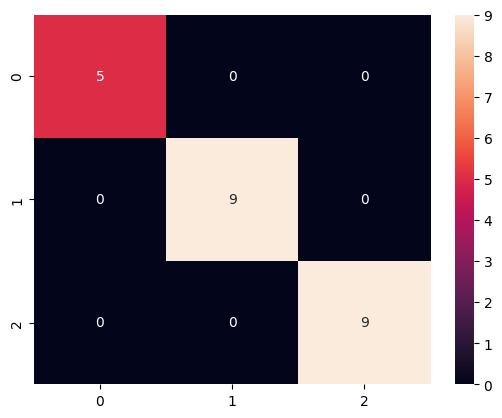

In [420]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(
    y_test,
    y_predicted
)
sns.heatmap(
    cm,
    annot=True
)

Training score for n_estimator 10: 0.9921259842519685
Testing score for n_estimator 10: 1.0
Training score for n_estimator 20: 1.0
Testing score for n_estimator 20: 0.9565217391304348
Training score for n_estimator 50: 1.0
Testing score for n_estimator 50: 0.9565217391304348
Training score for n_estimator 100: 1.0
Testing score for n_estimator 100: 1.0


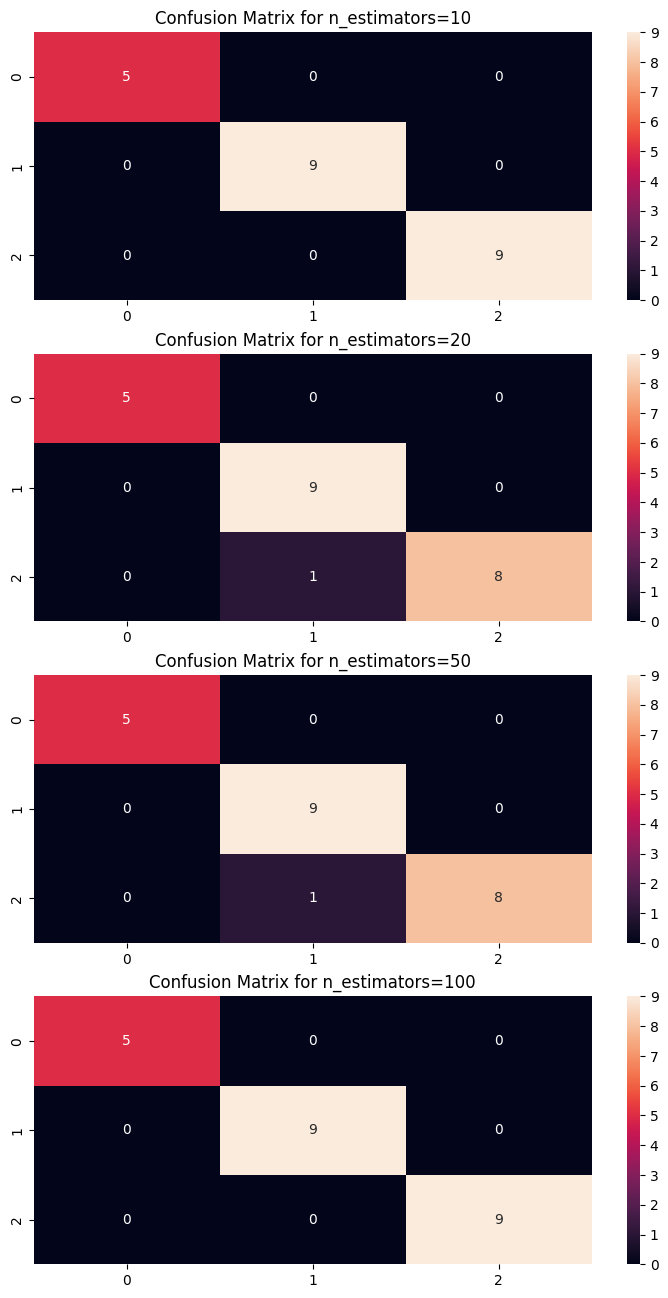

In [421]:
# checking with other estimator values
estimator_list = [10, 20, 50, 100]
fig, ax = plt.subplots(4, 1)
fig.set_figwidth(9)
fig.set_figheight(16)
for i, estimator in enumerate(estimator_list):
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    print(f'Training score for n_estimator {estimator}: {model.score(X_train, y_train)}')
    print(f'Testing score for n_estimator {estimator}: {model.score(X_test, y_test)}')
    y_predicted = model.predict(X_test)
    cm = confusion_matrix(
        y_test,
        y_predicted
    )
    sns.heatmap(
        cm,
        annot=True,
        ax=ax[i]
    )
    ax[i].set_title(f'Confusion Matrix for n_estimators={estimator}')